In [53]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [81]:
# Завантажуємо таблиці з веб-сторінки
url = "https://uk.wikipedia.org/wiki/%D0%9D%D0%B0%D1%81%D0%B5%D0%BB%D0%B5%D0%BD%D0%BD%D1%8F_%D0%A3%D0%BA%D1%80%D0%B0%D1%97%D0%BD%D0%B8"
dfs = pd.read_html(url, thousands=None, decimal=',')
df = dfs[13]
print(df.head())
# Визначити кількість рядків і стовпців
print("\nКількість рядків та стовпців:", df.shape)


             Регіон  1950  1960  1970  1990  2000  2012  2014  2019
0              Крим  23.0  20.6  16.0  13.0   7.3  12.6     —     —
1         Вінницька  22.4  19.2  14.2  12.4   8.4  11.2  10.9   7.6
2         Волинська  24.7  25.0  17.9  15.3  11.2  14.8  14.1  10.1
3  Дніпропетровська  20.4  20.4  15.1  12.3   7.1  11.2  11.1   7.1
4          Донецька  27.1  21.4  14.0  10.9   6.1   9.8   8.2     —

Кількість рядків та стовпців: (28, 9)


In [82]:
# Замінити значення "—" на NaN
df.replace("—", pd.NA, inplace=True)
print(df)

               Регіон  1950  1960  1970  1990  2000  2012  2014  2019
0                Крим  23.0  20.6  16.0  13.0   7.3  12.6  <NA>  <NA>
1           Вінницька  22.4  19.2  14.2  12.4   8.4  11.2  10.9   7.6
2           Волинська  24.7  25.0  17.9  15.3  11.2  14.8  14.1  10.1
3    Дніпропетровська  20.4  20.4  15.1  12.3   7.1  11.2  11.1   7.1
4            Донецька  27.1  21.4  14.0  10.9   6.1   9.8   8.2  <NA>
5         Житомирська  26.1  22.3  15.9  12.9   8.9  12.2  12.0   7.9
6        Закарпатська  31.4  27.3  20.7  16.8  11.5  15.1  14.6  10.4
7          Запорізька  21.9  19.7  15.0  12.4   7.1  10.6  10.6   6.8
8   Івано-Франківська  24.3  24.8  18.2  15.5  10.3  12.4  12.2   8.8
9            Київська  20.4  18.9  15.6  12.3   7.3  12.2  12.1   8.0
10     Кіровоградська  21.6  17.1  14.5  12.6   7.9  11.0  10.8   6.8
11          Луганська  26.2  23.5  14.4  11.6   6.2   9.6   5.1  <NA>
12          Львівська  23.4  24.0  17.1  14.0   9.1  11.9  11.9   8.7
13       Миколаївськ

In [83]:
# Визначити типи всіх стовпців
print("\nТипи всіх стовпців:")
print(df.dtypes)


Типи всіх стовпців:
Регіон     object
1950      float64
1960      float64
1970      float64
1990      float64
2000      float64
2012      float64
2014       object
2019       object
dtype: object


In [84]:
# Замінити типи нечислових колонок на числові
df[["2014", "2019"]] = df[["2014", "2019"]].apply(pd.to_numeric, errors='coerce')
print(df.dtypes)
print(df)

Регіон     object
1950      float64
1960      float64
1970      float64
1990      float64
2000      float64
2012      float64
2014      float64
2019      float64
dtype: object
               Регіон  1950  1960  1970  1990  2000  2012  2014  2019
0                Крим  23.0  20.6  16.0  13.0   7.3  12.6   NaN   NaN
1           Вінницька  22.4  19.2  14.2  12.4   8.4  11.2  10.9   7.6
2           Волинська  24.7  25.0  17.9  15.3  11.2  14.8  14.1  10.1
3    Дніпропетровська  20.4  20.4  15.1  12.3   7.1  11.2  11.1   7.1
4            Донецька  27.1  21.4  14.0  10.9   6.1   9.8   8.2   NaN
5         Житомирська  26.1  22.3  15.9  12.9   8.9  12.2  12.0   7.9
6        Закарпатська  31.4  27.3  20.7  16.8  11.5  15.1  14.6  10.4
7          Запорізька  21.9  19.7  15.0  12.4   7.1  10.6  10.6   6.8
8   Івано-Франківська  24.3  24.8  18.2  15.5  10.3  12.4  12.2   8.8
9            Київська  20.4  18.9  15.6  12.3   7.3  12.2  12.1   8.0
10     Кіровоградська  21.6  17.1  14.5  12.6   7.9  1

In [85]:
# Порахувати частку пропусків у кожному стовпці
missing_data = df.iloc[1:, 1:].isnull().sum() / (len(df) -1) * 100
print("\nЧастка пропусків у кожному стовпці:")
print(missing_data)



Частка пропусків у кожному стовпці:
1950     7.407407
1960     3.703704
1970     3.703704
1990     0.000000
2000     0.000000
2012     0.000000
2014     3.703704
2019    11.111111
dtype: float64


In [86]:
# Видалити останній рядок (дані по всій країні)
df = df.drop(df.index[-1])
print(f'\n Видалили останній рядок (дані по всій країні) \n {df}')


 Видалили останній рядок (дані по всій країні) 
                Регіон  1950  1960  1970  1990  2000  2012  2014  2019
0                Крим  23.0  20.6  16.0  13.0   7.3  12.6   NaN   NaN
1           Вінницька  22.4  19.2  14.2  12.4   8.4  11.2  10.9   7.6
2           Волинська  24.7  25.0  17.9  15.3  11.2  14.8  14.1  10.1
3    Дніпропетровська  20.4  20.4  15.1  12.3   7.1  11.2  11.1   7.1
4            Донецька  27.1  21.4  14.0  10.9   6.1   9.8   8.2   NaN
5         Житомирська  26.1  22.3  15.9  12.9   8.9  12.2  12.0   7.9
6        Закарпатська  31.4  27.3  20.7  16.8  11.5  15.1  14.6  10.4
7          Запорізька  21.9  19.7  15.0  12.4   7.1  10.6  10.6   6.8
8   Івано-Франківська  24.3  24.8  18.2  15.5  10.3  12.4  12.2   8.8
9            Київська  20.4  18.9  15.6  12.3   7.3  12.2  12.1   8.0
10     Кіровоградська  21.6  17.1  14.5  12.6   7.9  11.0  10.8   6.8
11          Луганська  26.2  23.5  14.4  11.6   6.2   9.6   5.1   NaN
12          Львівська  23.4  24.0  17.1 

In [87]:
# 8. Замінити пропущені значення на середнє по стовпцях
df.fillna(df.mean(numeric_only=True), inplace=True)
df = df.round(2)
print(f'\n Замінили пропущені значення на середнє по стовпцях \n {df}')


 Замінили пропущені значення на середнє по стовпцях 
                Регіон  1950   1960  1970  1990  2000  2012   2014   2019
0                Крим  23.0  20.60  16.0  13.0   7.3  12.6  11.14   8.02
1           Вінницька  22.4  19.20  14.2  12.4   8.4  11.2  10.90   7.60
2           Волинська  24.7  25.00  17.9  15.3  11.2  14.8  14.10  10.10
3    Дніпропетровська  20.4  20.40  15.1  12.3   7.1  11.2  11.10   7.10
4            Донецька  27.1  21.40  14.0  10.9   6.1   9.8   8.20   8.02
5         Житомирська  26.1  22.30  15.9  12.9   8.9  12.2  12.00   7.90
6        Закарпатська  31.4  27.30  20.7  16.8  11.5  15.1  14.60  10.40
7          Запорізька  21.9  19.70  15.0  12.4   7.1  10.6  10.60   6.80
8   Івано-Франківська  24.3  24.80  18.2  15.5  10.3  12.4  12.20   8.80
9            Київська  20.4  18.90  15.6  12.3   7.3  12.2  12.10   8.00
10     Кіровоградська  21.6  17.10  14.5  12.6   7.9  11.0  10.80   6.80
11          Луганська  26.2  23.50  14.4  11.6   6.2   9.6   5.10   8

In [88]:
# Список регіонів, де рівень народжуваності у 2019 році був вищим за середній по Україні
average_birth_rate_2019 = df['2019'].mean()
regions_above_average_num = df[df['2019'] > average_birth_rate_2019].index.tolist()
regions_above_average_name = df[df['2019'] > average_birth_rate_2019].iloc[:, 0].tolist()
print("\nРегіони, де рівень народжуваності у 2019 році був вищим за середній по Україні:")
print(average_birth_rate_2019)
print(regions_above_average_num)
print(regions_above_average_name)


Регіони, де рівень народжуваності у 2019 році був вищим за середній по Україні:
8.017777777777779
[0, 2, 4, 6, 8, 11, 12, 14, 16, 20, 23, 25, 26]
['Крим', 'Волинська', 'Донецька', 'Закарпатська', 'Івано-Франківська', 'Луганська', 'Львівська', 'Одеська', 'Рівненська', 'Херсонська', 'Чернівецька', 'Київ', 'Севастополь']


In [89]:
# Знайти регіон з найвищим рівнем народжуваності у 2014 році
highest_birth_rate_2014 = df['2014'].idxmax()
highest_birth_rate_2014_region = df.loc[highest_birth_rate_2014, ['Регіон']]
print(f"\nРегіон з найвищим рівнем народжуваності у 2014 році: {highest_birth_rate_2014_region.item()}")


Регіон з найвищим рівнем народжуваності у 2014 році: Рівненська


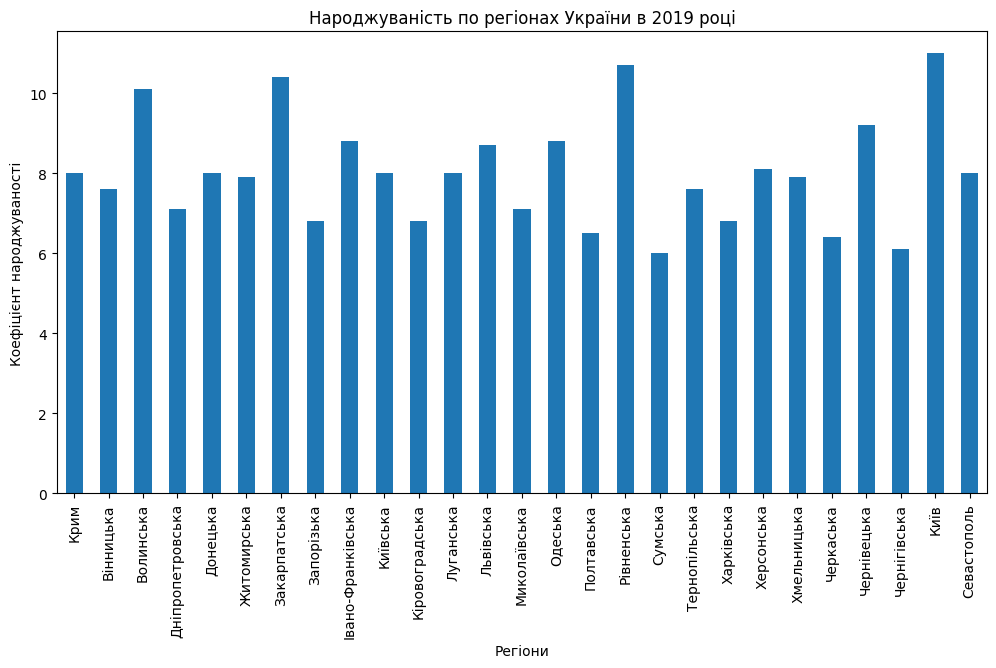

In [90]:
# Побудувати стовпчикову діаграму народжуваності по регіонах у 2019 році
df['2019'].plot(kind='bar', figsize=(12, 6))
plt.title("Народжуваність по регіонах України в 2019 році")
plt.xlabel("Регіони")
plt.ylabel("Коефіцієнт народжуваності")
plt.xticks(ticks=range(len(df)), labels=df['Регіон'], rotation=90)
#plt.xticks(rotation=90)
plt.show()

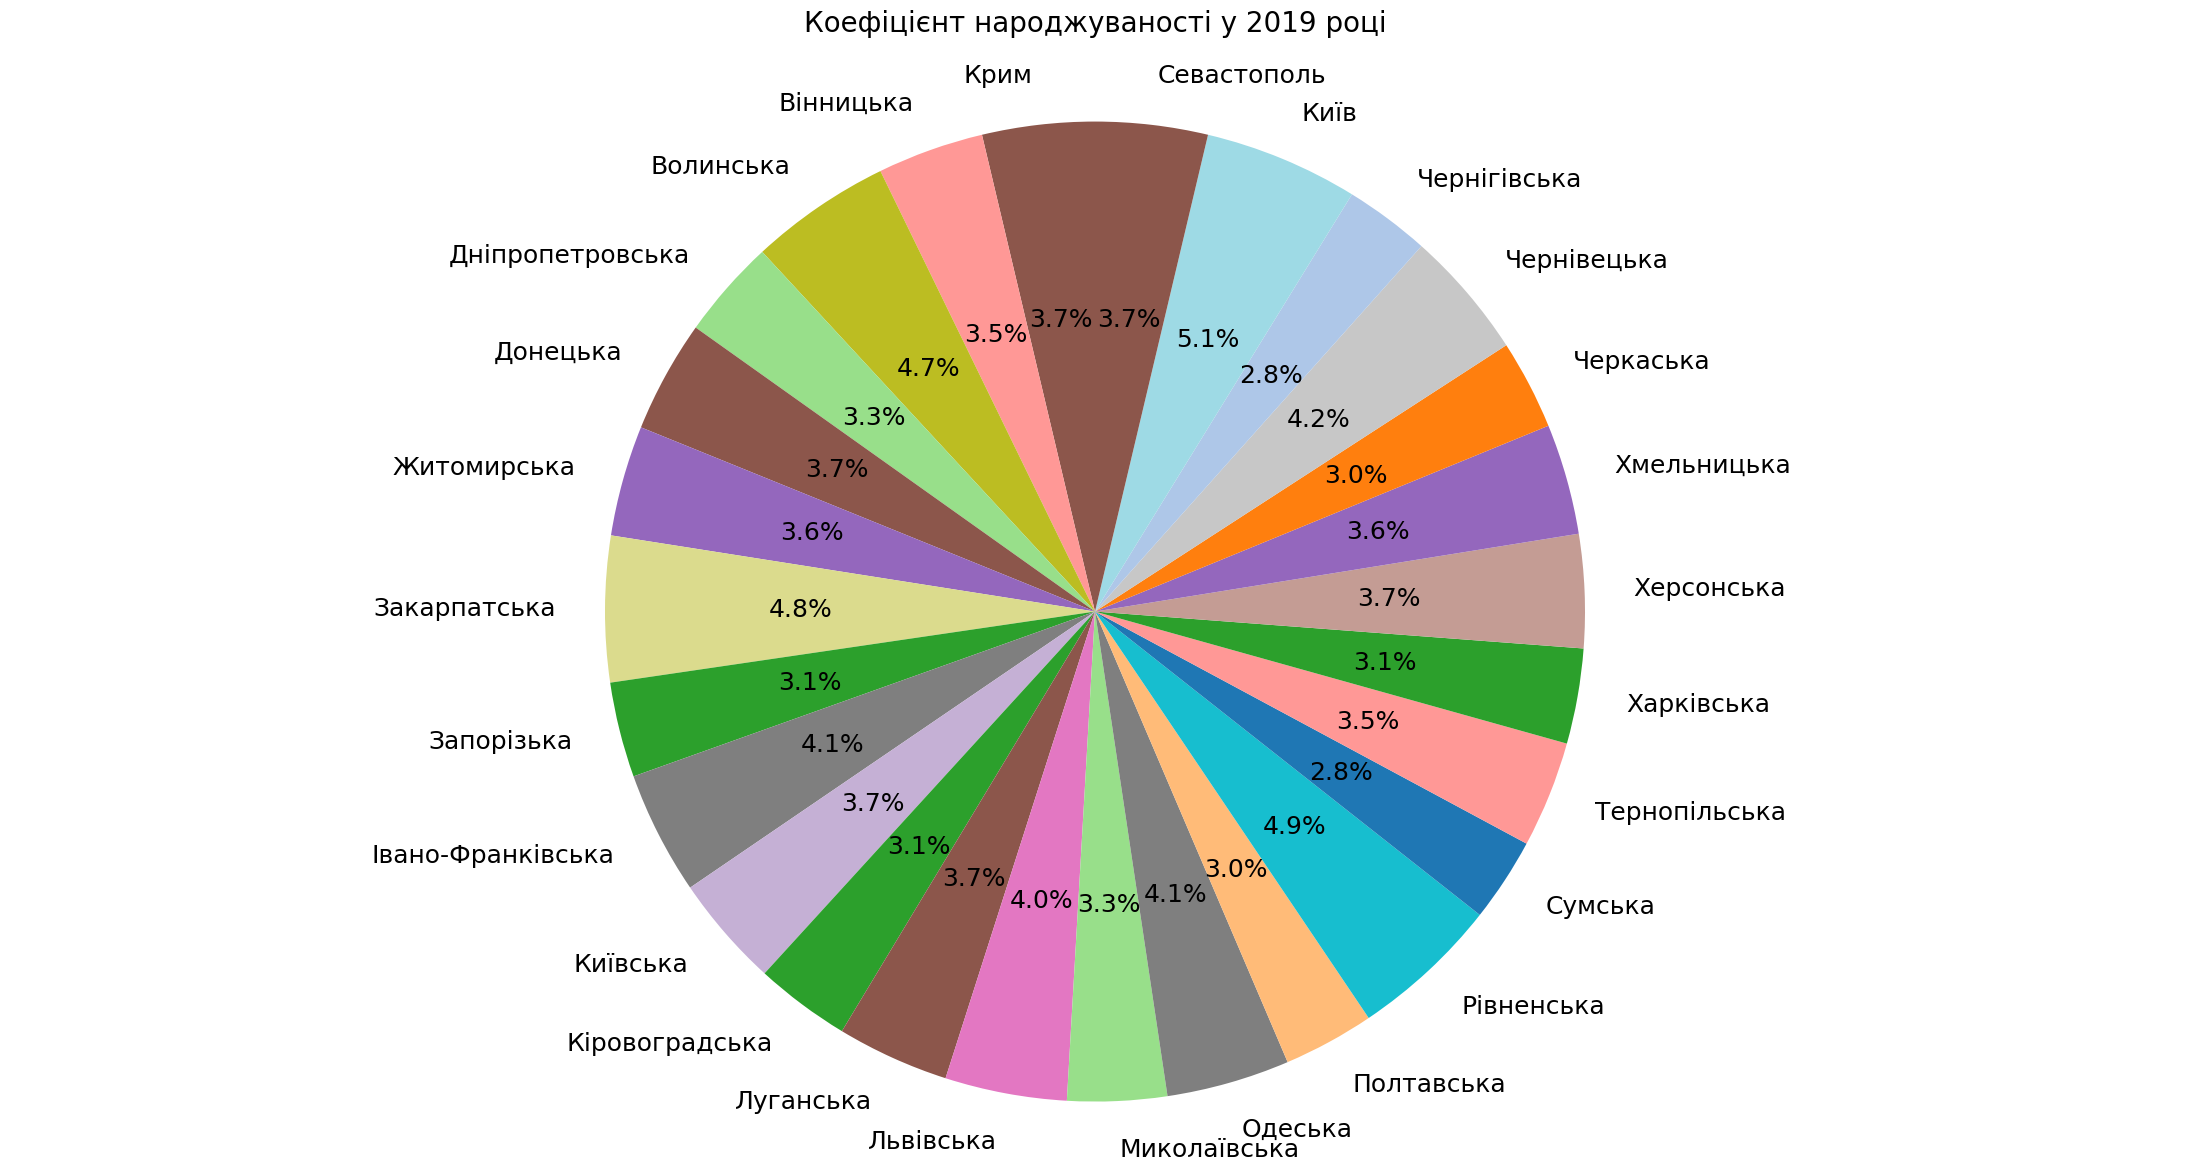

In [91]:
# Унікальні значення для стовпця '2019'
unique_values = np.unique(df['2019'])

# кольорі для кожного унікального значення
colors = plt.get_cmap('tab20', len(unique_values))  
value_to_color = {value: colors(i / len(unique_values)) for i, value in enumerate(unique_values)}

# кольор для кожного регіону в залежності від значення 
region_colors = df['2019'].map(value_to_color)

# Побудова кругової діаграми
plt.figure(figsize=(28, 14))
plt.pie(df['2019'], labels=df['Регіон'], autopct='%1.1f%%', startangle=90, 
        colors=region_colors,  
        textprops={'fontsize': 18}) 

plt.title('Коефіцієнт народжуваності у 2019 році\n', fontsize=20)
plt.axis('equal')
plt.show()

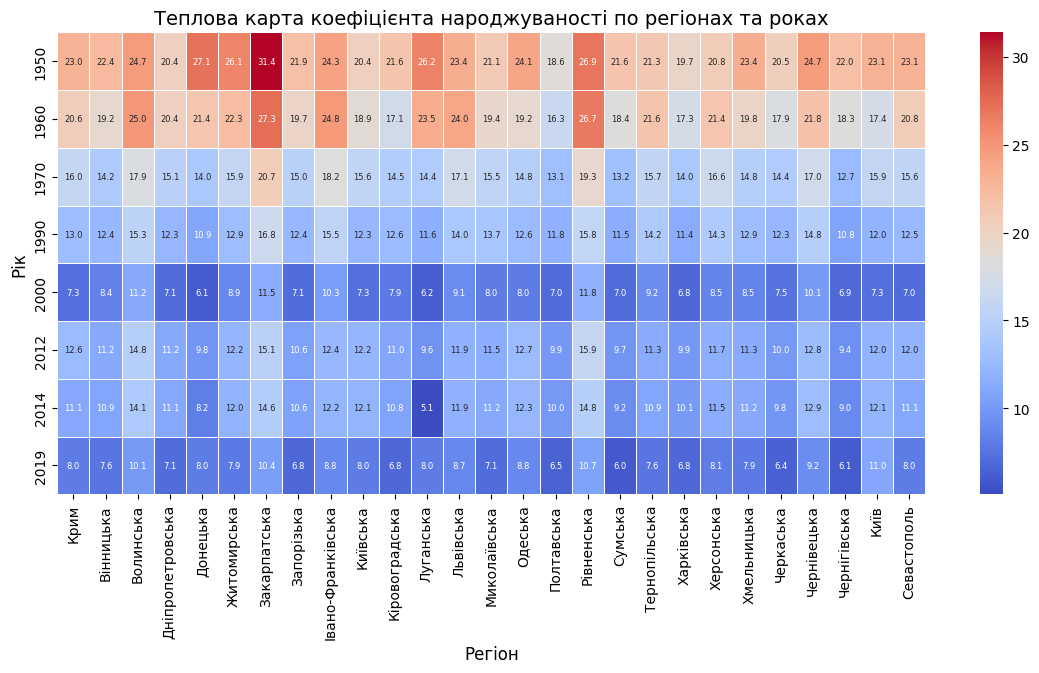

In [92]:
# Створення таблиці для теплової карти
heatmap_data = df.set_index('Регіон').transpose()

plt.figure(figsize=(14, 6))
sns.heatmap(heatmap_data, cmap='coolwarm', annot=True, fmt=".1f", linewidths=0.5, annot_kws={"size": 6})
plt.title('Теплова карта коефіцієнта народжуваності по регіонах та роках', fontsize=14)
plt.xlabel('Регіон', fontsize=12)
plt.ylabel('Рік', fontsize=12)
plt.show()